In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('./source/datasets_177976_401124_Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = data.drop(['CustomerID'], axis = 1)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
data['Genre'] = data['Genre'].map({'Female': 1, 'Male': 0})
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


#### Clustering based on Annual Income and Spending Score

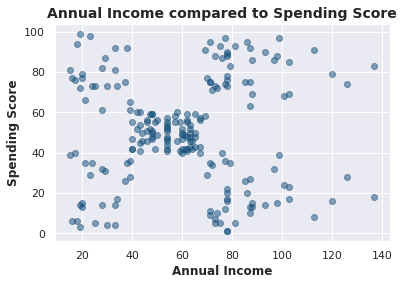

In [5]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],                               alpha = 0.5,
            color = '#124E78')
plt.title('Annual Income compared to Spending Score',
              fontsize = 14,
              fontweight = 'bold')
plt.xlabel('Annual Income',
               fontsize = 12,
               fontweight = 'bold')
plt.ylabel('Spending Score',
               fontsize = 12,
               fontweight = 'bold')
plt.show()

In [14]:
X = data.iloc[:,2:4]
len(X)

200

In [7]:
wcss = []
for i in range(1, 200):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcssIter = kmeans.inertia_
    wcss.append(wcssIter)

/tmp/ipykernel_542/3284795977.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  kmeans.fit(X)
/tmp/ipykernel_542/3284795977.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  kmeans.fit(X)
/tmp/ipykernel_542/3284795977.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  kmeans.fit(X)


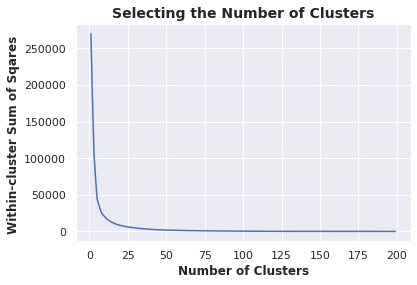

In [8]:
numClusters = range(1, 200)
plt.plot(numClusters, wcss)
plt.title('Selecting the Number of Clusters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12, fontweight = 'bold')
plt.ylabel('Within-cluster Sum of Sqares ', fontsize = 12, fontweight = 'bold')
plt.savefig('visualizations/SNC.png')
plt.show()

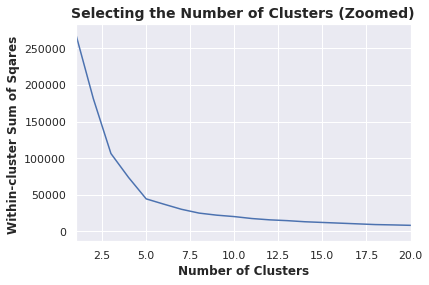

In [9]:
numClusters = range(1, 200)
plt.plot(numClusters, wcss)
plt.title('Selecting the Number of Clusters (Zoomed)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12, fontweight = 'bold')
plt.xlim(left = 1, right = 20)
plt.ylabel('Within-cluster Sum of Sqares ', fontsize = 12, fontweight = 'bold')
plt.savefig('visualizations/SNCB.png')
plt.show()

In [17]:
wcss

[269981.2800000001,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25028.020475269415,
 22206.98601937624,
 20251.280073287533,
 17595.28888108518,
 15817.245013841315,
 14718.990350772074,
 13209.793671769407,
 12214.457475857476,
 11074.612947578738,
 10301.116666666667,
 9349.427367318673,
 8878.135556600264,
 8241.056564986737,
 7747.5114859340865,
 7357.967424242425,
 6976.150848481022,
 6317.139745976457,
 6140.563780252144,
 5706.058112870961,
 5515.658023458023,
 5362.548867798869,
 4976.760284160284,
 4826.710907208734,
 4534.541991341992,
 4204.279112554113,
 3996.743328240387,
 3965.065187590188,
 3628.163636363636,
 3521.1241341991345,
 3298.197727272728,
 3184.782792207792,
 3010.893001443002,
 2874.02077922078,
 2699.9326839826845,
 2586.5598484848488,
 2418.3367715617715,
 2396.3029220779226,
 2237.4174242424247,
 2119.780303030303,
 2058.0936868686867,
 1996.415512265512,
 1899.9838744588744,
 

In [10]:
kmeans = KMeans(7)
kmeans.fit(X)


KMeans(n_clusters=7)

In [11]:
identifiedClusters = kmeans.fit_predict(X)
identifiedClusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 0, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [12]:
dataWClusters = data.copy()
dataWClusters['Clusters'] = identifiedClusters
dataWClusters.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4


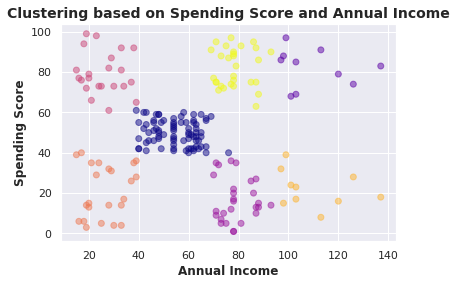

In [13]:
plt.scatter(dataWClusters['Annual Income (k$)'],
            dataWClusters['Spending Score (1-100)'],
            c = dataWClusters['Clusters'],
            alpha = 0.5,
            cmap = 'plasma')

plt.title('Clustering based on Spending Score and Annual Income',
          fontsize = 14,
          fontweight = 'bold')
plt.xlabel('Annual Income',
          fontsize = 12,
          fontweight = 'bold')
plt.ylabel('Spending Score',
          fontsize = 12,
          fontweight = 'bold')
plt.savefig('visualizations/CSSAI.png')
plt.show()

In [29]:
newData = pd.read_csv("./source/clustered.csv")

In [32]:
newData

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,3
1,0,21,15,81,4
2,1,20,16,6,3
3,1,23,16,77,4
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,6
197,0,32,126,74,2
198,0,32,137,18,6


In [37]:
(newData.Genre == 0).count()

200

In [38]:
array = [1, 1]

In [41]:
array[1]

1

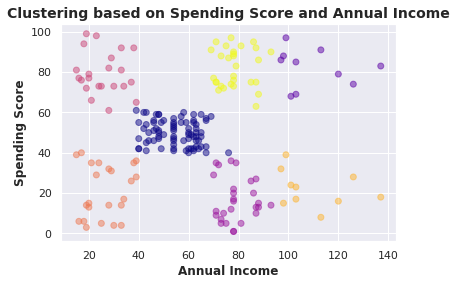

In [31]:
plt.scatter(newData['Annual Income (k$)'],
            newData['Spending Score (1-100)'],
            c = dataWClusters['Clusters'],
            alpha = 0.5,
            cmap = 'plasma')

plt.title('Clustering based on Spending Score and Annual Income',
          fontsize = 14,
          fontweight = 'bold')
plt.xlabel('Annual Income',
          fontsize = 12,
          fontweight = 'bold')
plt.ylabel('Spending Score',
          fontsize = 12,
          fontweight = 'bold')
plt.savefig('visualizations/CSSAI.png')
plt.show()